# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

* **Also loading Coordinates of Bounding Boxes around traffic signs for Visualization Purposes**

In [2]:
c_train, c_test = train['coords'], test['coords']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

* **Importing the traffic sign names as a list with the key as the id of the sign**

In [3]:
import csv

sign_names = []
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        sign_names.append(row[1])
    sign_names.reverse()
    sign_names.pop()
    sign_names.reverse()

* **Meta Analysis of Training Data**

In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
assert(len(X_train) == len(y_train))
n_train = len(X_train)

# TODO: Number of testing examples.
assert(len(X_test)==len(y_test))
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

* **Plotting 25 random images from the Training dataset**

/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


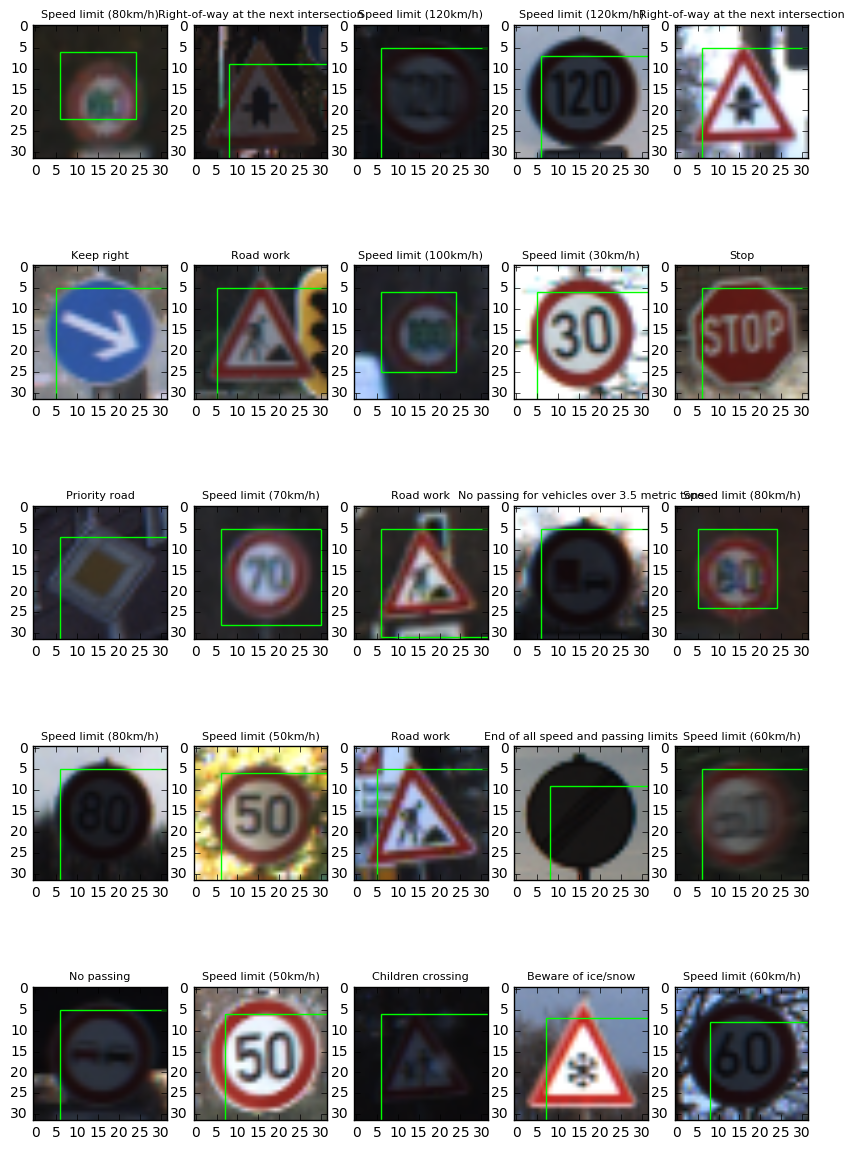

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

num_x = 5
num_y = 5
fig, ax = plt.subplots(num_y,num_x)
fig.set_size_inches(10,15)
for i in range(num_x*num_y):
    n = random.random()*n_train
    ax[int(i/num_x)][i%num_x].imshow(X_train[n])
    coords = c_train[n]
    rect = patches.Rectangle((coords[0],coords[1]),coords[2]-coords[0],coords[3]-coords[1],edgecolor='#00ff00',facecolor='none')
    ax[int(i/num_x)][i%num_x].add_patch(rect)
    ax[int(i/num_x)][i%num_x].set_title(sign_names[y_train[n]], fontsize=8)

plt.show()

* **Histogram of Labels in the Training Dataset**

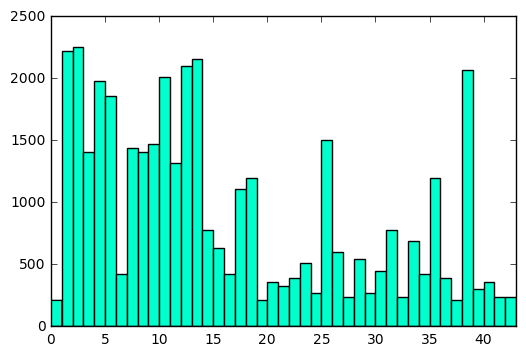

Maximum Occuring Traffic Sign in the data: Speed limit (50km/h)
Minimum Occuring Traffic Sign in the data: Go straight or left


In [6]:
import numpy as np
hist_data = np.histogram(y_train,bins=range(44))
hist_map = {}
for occr,index in zip(hist_data[0],hist_data[1]):
    hist_map[occr]=index

plt.hist(y_train,bins=range(44),color='#00ffCC')
plt.axis([0,43,0,2500])
plt.show()

print("Maximum Occuring Traffic Sign in the data: "+sign_names[hist_map[np.amax(hist_data[0])]])
print("Minimum Occuring Traffic Sign in the data: "+sign_names[hist_map[np.amin(hist_data[0])]])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
import tensorflow as tf

In [8]:
'''Convenience Function'''
def conv2d(x,W,b,output_depth,train=1,strides=1):

    '''Tensor flow conv2d with same vertical and horizontal strides'''
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding='VALID')
    
    '''Batch Normaliztion'''
    x = batch_norm(x,output_depth,train)
    
    '''Adding the bias'''
    x = tf.nn.bias_add(x,b)
    
    '''Relu Activation'''
    return tf.nn.relu(x)   

In [9]:
'''Convenience Function'''
def max_pool(x,k=2):
    return tf.nn.max_pool(x,ksize=[1,k,k,1],strides=[1,k,k,1],padding='VALID')

**Defining depth of each layer**

Initally I had chosen **shallow depths** but I wasn't able to **overfit** a small subsample of the training set so I have chosen a conv neural net of medium depth for my purposes. 

* `1_c` : First Convolutional Layer (Depth: 30 5x5)
* `2_c` : Second Convolutional Layer (Depth: 200 5x5)
* `3_f` : Third Layer is Fully Connected (2200 neurons)
* `4_f` : Fouth is Fully Connected (1000 neurons)
* `5_f` : Fifth is Fully Connected (500 neurons)
* `6_f` : Sixth is also Fully Connected (120 neurons)
* `7_0` : Output Layer (43)

**Summary :** 2 convolutional Layers, 4 fully connected layers and an output layer.

In [10]:
depth = {
    '1_c': 30,
    '2_c': 200,
    '3_f': 2200,
    '4_f': 1000,
    '5_f': 500,
    '6_f': 120,
    '7_o': 43
}

##### Weights:

All have been initialized throught the **Xavier Initializer**. Initialization is very important and **Xavier Initializer** is currently a good default choice for that (suggested in CS213n). It helps us prevent the weights from very high values, or dying out, both of which are not desirable.

In [11]:
weights = {
    '1_conv': tf.get_variable("W_1_conv", shape=[5, 5, 3, depth['1_c']],initializer=tf.contrib.layers.xavier_initializer()),
    
    '2_conv': tf.get_variable("W_2_conv", shape=[5, 5, depth['1_c'], depth['2_c']],initializer=tf.contrib.layers.xavier_initializer()),
    
    '3_fullc': tf.get_variable("W_3_fullc", shape=[5000, depth['3_f']],initializer=tf.contrib.layers.xavier_initializer()),
    
    '4_fullc': tf.get_variable("W_4_fullc", shape=[depth['3_f'], depth['4_f']],initializer=tf.contrib.layers.xavier_initializer()),
    
    '5_fullc': tf.get_variable("W_5_fullc", shape=[depth['4_f'], depth['5_f']],initializer=tf.contrib.layers.xavier_initializer()),
    
    '6_fullc': tf.get_variable("W_6_fullc", shape=[depth['5_f'], depth['6_f']],initializer=tf.contrib.layers.xavier_initializer()),
    
    '7_out': tf.get_variable("W_7_out", shape=[depth['6_f'], depth['7_o']],initializer=tf.contrib.layers.xavier_initializer())
}

In [12]:
'''Biases'''
biases = {
    '1_conv': tf.Variable(tf.zeros(depth['1_c'])),
    '2_conv': tf.Variable(tf.zeros(depth['2_c'])),
    '3_fullc': tf.Variable(tf.zeros(depth['3_f'])),
    '4_fullc': tf.Variable(tf.zeros(depth['4_f'])),
    '5_fullc': tf.Variable(tf.zeros(depth['5_f'])),
    '6_fullc': tf.Variable(tf.zeros(depth['6_f'])),
    '7_out': tf.Variable(tf.zeros(depth['7_o']))
}

I use batch normalization throughout the network so that it can learn to normalize it's weights if it is beneficial. [Normaliztion of Weights](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/91cc6685-08df-4277-b53d-3a792b02420d/concepts/71191606550923), Inspired from this lecture of CS213n [Youtube Link](https://www.youtube.com/watch?v=GUtlrDbHhJM)

**Batch Normalization turns on only during training**

In [13]:
def batch_norm(x, n_out, train):
    """
    Batch normalization on convolutional maps.
    Ref.: http://stackoverflow.com/questions/33949786/how-could-i-use-batch-normalization-in-tensorflow
    Args:
        x:           Tensor, 4D BHWD input maps
        n_out:       integer, depth of input maps
        phase_train: boolean tf.Varialbe, true indicates training phase
        scope:       string, variable scope
    Return:
        normed:      batch-normalized maps
    """
    with tf.variable_scope('bn'):
        beta = tf.Variable(tf.constant(0.0, shape=[n_out]),
                                     name='beta', trainable=True)
        gamma = tf.Variable(tf.constant(1.0, shape=[n_out]),
                                      name='gamma', trainable=True)
        batch_mean, batch_var = tf.nn.moments(x, [0,1,2], name='moments')
        ema = tf.train.ExponentialMovingAverage(decay=0.5)

        def mean_var_with_update():
            ema_apply_op = ema.apply([batch_mean, batch_var])
            with tf.control_dependencies([ema_apply_op]):
                return tf.identity(batch_mean), tf.identity(batch_var)

        mean, var = tf.cond(train>0,mean_var_with_update,lambda: (ema.average(batch_mean), ema.average(batch_var)))
        normed = tf.nn.batch_normalization(x, mean, var, beta, gamma, 1e-3)
    return normed

In [14]:
def batch_norm_fullc(x, n_out, train):
    
    '''Batch normalization for fully connected layers'''
    
    with tf.variable_scope('bn'):
        beta = tf.Variable(tf.constant(0.0, shape=[n_out]),
                                     name='beta', trainable=True)
        gamma = tf.Variable(tf.constant(1.0, shape=[n_out]),
                                      name='gamma', trainable=True)
        batch_mean, batch_var = tf.nn.moments(x, [0], name='moments')
        ema = tf.train.ExponentialMovingAverage(decay=0.5)

        def mean_var_with_update():
            ema_apply_op = ema.apply([batch_mean, batch_var])
            with tf.control_dependencies([ema_apply_op]):
                return tf.identity(batch_mean), tf.identity(batch_var)

        mean, var = tf.cond(train>0,
                            mean_var_with_update,
                            lambda: (ema.average(batch_mean), ema.average(batch_var)))
        normed = tf.nn.batch_normalization(x, mean, var, beta, gamma, 1e-3)
    return normed

In [15]:
from tensorflow.contrib.layers import flatten

def TS_Classifier(x,train=1):  
    
    ''' Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x30. '''
    conv1 = conv2d(x,weights['1_conv'],biases['1_conv'],depth['1_c'],train)

    # Max Pooling. Input = 28x28x30. Output = 14x14x30.
    conv1 = max_pool(conv1)
    
    
    ''' Layer 2: Convolutional. Input = 14x14x30 Output = 10x10x200. '''
    
    conv2 = conv2d(conv1,weights['2_conv'],biases['2_conv'],depth['2_c'],train)

    # Max Pooling. Input = 10x10x200. Output = 10x10x200.
    conv2 = max_pool(conv2)
    
    
    ''' Flatten: Input = 10x10x200. Output = 5000 '''
    
    fc0 = flatten(conv2)
    
    
    ''' Layer 3: Fully Connected. Input = 5000. Output = 2200. '''
    
    fullc1 = tf.add(tf.matmul(fc0,weights['3_fullc']),biases['3_fullc'])
    
    # Batch Normalization. (Only During Training)
    fullc1 = batch_norm_fullc(fullc1,depth['3_f'],train)
    
    # Relu Activation.
    fullc1 = tf.nn.relu(fullc1)

    # Dropout: 0.5 (Only During Training)
    fullc1 = tf.cond(train>0, lambda: tf.nn.dropout(fullc1,0.50), lambda: fullc1)
    
    
    ''' Layer 4: Fully Connected. Input = 2200. Output = 1000'''
    
    fullc2 = tf.add(tf.matmul(fullc1,weights['4_fullc']),biases['4_fullc'])
    
    # Batch Normalization (Only During Training)
    fullc2 = batch_norm_fullc(fullc2,depth['4_f'],train)
    
    # Relu Activation
    fullc2 = tf.nn.relu(fullc2)
    
    # Dropout: 0.5 (Only During Training)
    fullc2 = tf.cond(train>0, lambda: tf.nn.dropout(fullc2,0.50), lambda: fullc2)
    
    
    ''' Layer 5: Fully Connected. Input = 1000. Output = 500'''
    
    fullc3 = tf.add(tf.matmul(fullc2,weights['5_fullc']),biases['5_fullc'])
    
    # Batch normalization. (Only During Training)
    fullc3 = batch_norm_fullc(fullc3,depth['5_f'],train)
    
    # Relu Activation
    fullc3 = tf.nn.relu(fullc3)
    
    # Dropout: 0.5 (Only During Training)
    fullc3 = tf.cond(train>0, lambda: tf.nn.dropout(fullc3,0.50), lambda: fullc3)
    
    
    ''' Layer 6: Fully Connected. Input = 500. Output = 120'''
    
    fullc4 = tf.add(tf.matmul(fullc3,weights['6_fullc']),biases['6_fullc'])
    
    # Batch normalization. (Only During Training)
    fullc4 = batch_norm_fullc(fullc4,depth['6_f'],train)
    
    # Relu Activation
    fullc4 = tf.nn.relu(fullc4)
    
    # Dropout 0.5 (Only During Training)
    fullc4 = tf.cond(train>0, lambda: tf.nn.dropout(fullc4,0.50), lambda: fullc4)
    
    
    ''' Layer 7: Output, Fully Connected. Input = 120. Output = 43'''
    
    logits = tf.add(tf.matmul(fullc4,weights['7_out']),biases['7_out'])
    
    return logits

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

First I normalized the data by the maximum value of a channel. This was done for [numerical stability](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/91cc6685-08df-4277-b53d-3a792b02420d/concepts/4da33923-945b-4dc4-b13d-920e7c14f684). So that the network has an easy path of convergance

In [16]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import numpy as np

X_train = np.array(X_train)
X_train = X_train/255

I normalized the data so that the optimizer doesn't have a hard time and it can optimize quiker. [Normalize weights and Inputs Lecture](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/91cc6685-08df-4277-b53d-3a792b02420d/concepts/71191606550923)  from the Deep Learning Section. 

I compute the mean image of the training set and subtracted from the whole training set.

In [17]:
chann_index_swap = np.swapaxes(X_train,0,3)
mean_image = [[[sum(pixel)/len(pixel) for pixel in col] for col in row] for row in chann_index_swap]
mean_image = np.swapaxes(mean_image,0,2)
mean_image = np.swapaxes(mean_image,0,1)

X_train = X_train - mean_image

* **Plotting the mean image. Just for fun ;-)**

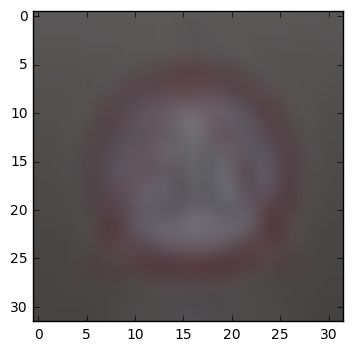

In [18]:
import matplotlib.pyplot as plt
plt.imshow(mean_image)
plt.show()

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

We initially have two sets of data, namely training and test data. The training set has **39209** examples while the test set has **12630** examples.

I sliced out **20%** of the training data for validation.

In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I have modified the **LeNet** ConvNet for Traffic Sign Classification purposes. I mainly **increased the depth** of the various Layers. **Added more fully connected layers.** I also added **batch normalization**, **dropout** as well as **L2 regularization** to my model.

For initialization of weight paramerters I used **Xavier initializer** instead of the **truncated normal** one. I got this form the **CS213n Lectures on "Conv Nets For Visual Recognition"** and searched the web, and found favourable reviews of this method of initialization that has recently been proposed.

Initally I had chosen **shallow depths** but I wasn't able to **overfit** a small subsample of the training set so I have chosen a conv neural net of medium depth for my purposes. 

* `1_c` : First Convolutional Layer (Depth: 30, Dimensions:5x5 stride: 1x1, padding: 'VALID')
* `2_c` : Second Convolutional Layer (Depth: 200 5x5,)
* `3_f` : Third Layer is Fully Connected (2200 neurons)
* `4_f` : Fouth is Fully Connected (1000 neurons)
* `5_f` : Fifth is Fully Connected (500 neurons)
* `6_f` : Sixth is also Fully Connected (120 neurons)
* `7_0` : Output Layer (43)

**Summary :** 2 convolutional Layers, 4 fully connected layers and an output layer.


Input and output placeholders. Also One Hot encoding the outputs

In [20]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

'''One hot encoding the Labels'''
one_hot_y = tf.one_hot(y, 43)

#### **Training Setup**

* **Applying learning rate decay.**
* **L2 Regularization on the loss.**
* **Using Softmax Cross Validation fuction as the loss function**
* **Using the Adam Optimizer** 

In [21]:
'''Learning rate made into a placeholder for exponential decay'''
rate = tf.placeholder(tf.float32)

'''L2 Regularization Hyper-parameter'''
beta = tf.placeholder(tf.float32)

'''Parameter for switching between training and testing modes'''
train = tf.placeholder(tf.int32)

'''Initial Learning Rate'''
lr = 0.0001

'''L2 regularization (Beta)'''
b = 1e-6

'''Rate of Learning rate decay'''
k = 1e-7


'''MODEL'''
logits = TS_Classifier(x,train)

'''LOSS'''
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss = tf.reduce_mean(cross_entropy)
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['1_conv']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['2_conv']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['3_fullc']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['4_fullc']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['5_fullc']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['6_fullc']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['7_out']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['1_conv']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['2_conv']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['3_fullc']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['4_fullc']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['5_fullc']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['6_fullc']))
loss_operation = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['7_out']))

'''OPTIMIZER'''
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

**Evaluation Setup from LeNet-Lab in the Convolutional Neural Networks Section**

In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,train:-1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Babysitting the Network

Applying the network on a very small set of images from the training set to verify that it can overfit that small set of data. Inspired by lecture from CS213n [Youtube Link](https://www.youtube.com/watch?v=GUtlrDbHhJM)

In [23]:
import math

''' Small Training Subset of 20 images '''
small_sample_x = X_train[0:20]
small_sample_y = y_train[0:20]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer(),feed_dict={train:1})
    num_examples = len(small_sample_x)
    
    batch_size = 10
    print("Can we overfit?.......")
    print()
    
    print("Decay: "+str(k))
    for i in range(100):
        
        lr = float(lr*np.exp(-k*i))
        
        for offset in range(0,num_examples,batch_size):
            end = offset + batch_size
            batch_x, batch_y = small_sample_x[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x:small_sample_x, y:small_sample_y, train:-1, rate:lr, beta:b})
            
        c = sess.run(loss_operation, feed_dict={x: small_sample_x, y: small_sample_y,train:-1, rate:lr, beta:b})
        print("Epoch: "+str(i)+" loss: "+str(c)+" learn rate:"+str(lr)+" beta: "+str(b)+" decay: "+str(k))

Can we overfit?.......

Decay: 1e-07
Epoch: 0 loss: 1.26578e+07 learn rate:0.0001 beta: 1e-06 decay: 1e-07
Epoch: 1 loss: 7.68562e+06 learn rate:9.99999900000005e-05 beta: 1e-06 decay: 1e-07
Epoch: 2 loss: 1.55988e+06 learn rate:9.99999700000045e-05 beta: 1e-06 decay: 1e-07
Epoch: 3 loss: 778754.0 learn rate:9.9999940000018e-05 beta: 1e-06 decay: 1e-07
Epoch: 4 loss: 48314.2 learn rate:9.999990000005e-05 beta: 1e-06 decay: 1e-07
Epoch: 5 loss: 0.00269625 learn rate:9.999985000011251e-05 beta: 1e-06 decay: 1e-07
Epoch: 6 loss: 237910.0 learn rate:9.99997900002205e-05 beta: 1e-06 decay: 1e-07
Epoch: 7 loss: 73343.3 learn rate:9.999972000039199e-05 beta: 1e-06 decay: 1e-07
Epoch: 8 loss: 151712.0 learn rate:9.9999640000648e-05 beta: 1e-06 decay: 1e-07
Epoch: 9 loss: 0.00268736 learn rate:9.99995500010125e-05 beta: 1e-06 decay: 1e-07
Epoch: 10 loss: 12834.4 learn rate:9.99994500015125e-05 beta: 1e-06 decay: 1e-07
Epoch: 11 loss: 0.00268252 learn rate:9.9999340002178e-05 beta: 1e-06 decay: 

#### Training on the whole training set

In [24]:
EPOCHS = 100
BATCH_SIZE = 500

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables(), feed_dict={train:1})
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        lr = float(lr*np.exp(-k*i))
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, train:1, rate:lr, beta:b})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'ts_classifier')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.423

EPOCH 2 ...
Validation Accuracy = 0.540

EPOCH 3 ...
Validation Accuracy = 0.639

EPOCH 4 ...
Validation Accuracy = 0.719

EPOCH 5 ...
Validation Accuracy = 0.795

EPOCH 6 ...
Validation Accuracy = 0.846

EPOCH 7 ...
Validation Accuracy = 0.879

EPOCH 8 ...
Validation Accuracy = 0.902

EPOCH 9 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.937

EPOCH 11 ...
Validation Accuracy = 0.947

EPOCH 12 ...
Validation Accuracy = 0.958

EPOCH 13 ...
Validation Accuracy = 0.965

EPOCH 14 ...
Validation Accuracy = 0.973

EPOCH 15 ...
Validation Accuracy = 0.978

EPOCH 16 ...
Validation Accuracy = 0.980

EPOCH 17 ...
Validation Accuracy = 0.985

EPOCH 18 ...
Validation Accuracy = 0.988

EPOCH 19 ...
Validation Accuracy = 0.990

EPOCH 20 ...
Validation Accuracy = 0.992

EPOCH 21 ...
Validation Accuracy = 0.992

EPOCH 22 ...
Validation Accuracy = 0.992

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* I used the **Adam Optimizer** *(Because it is a good default one.)*
* EPOCHS = **100** *(By Trial and Error)*
* BATCH_SIZE = **500** *(By Trial and Error)*
* Learning Rate = **0.0001** *(Testing over learning rates in the log scale from 1.0 to 1e-7)*
* Beta(L2 Regularization) = **1e-6** *(Testing over betas in the log scale from 1.0 to 1e-6)*
* Dropout = **0.5** *(Most commonly used)*

Before training the model on the whole dataset. I did a **sanity check** in order to ensure that the network has enough capacity to learn from the training set. This sanity check was training the network on a very small subset **(20 images)** from the training set and ensuring that it could **overfit** this data i.e. **loss** is very close to **zero**. 

After passing this sanity check, I trained the network on the whole training set and caculated it accuracy on the validation step after each epoch. After about **50** epochs it started converging to an accuracy of about **99.8%** and stayed that way till the 100th epoch.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

For optimization I used the Adam Optmizer because it reduces dependance on hyperparamters and is a good **default choice** (Suggeted in CS213n and various [articles](http://sebastianruder.com/optimizing-gradient-descent/) on the web). 

Epochs and batch size where chozen by trial and error. 

**Learning rate**, **Beta(L2 Regularization)** and **learning decay** where chosen by Testing on values in logrithmic steps over a certain range(**1.0** to **1e-7** in **log10** steps). I set the dropout in the fully connected layers of my network to **0.5** because it is very commonly used.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

#### Normalizing the test set

* Dividing by maximum in all channels
* Subtracting the mean image of the **training set**

In [25]:
X_test_norm = X_test/255
X_test_norm = X_test_norm - mean_image

In this section I devise a test fucntion which returns:
* The accuray.
* The **indexes** of the images gotten **wrong** by the network.
* The **wrong predictions** of those images.

In [26]:
predictions = tf.argmax(logits, 1)
actual = tf.argmax(one_hot_y,1)
correct_prediction = tf.equal(predictions, actual)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

BATCH_SIZE = 500
def evaluate_on_test_data(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()

    ''' List of indexes and prediction of images gotten wrong by the network'''
    gotten_wrong_list = []
    
    gotten_wrong_index = 0
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,train:-1})
        pred = sess.run(predictions, feed_dict={x:batch_x, y:batch_y, train:-1})
        act = sess.run(actual, feed_dict={y:batch_y})
        
        for a,b in zip(pred,act):
            if(not a == b):
                gotten_wrong_list.append((gotten_wrong_index,a))
            gotten_wrong_index = gotten_wrong_index+1
        total_accuracy += (accuracy * len(batch_x))
    return (total_accuracy / num_examples), gotten_wrong_list

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

* We Run the test Images through convnet and also retrive indexes of images **gotten wrong** by the network.

In [27]:
### Run the predictions here.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, gotten_wrong_list = evaluate_on_test_data(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.958


* Plotting **5** out of the images gotten wrong by the network.

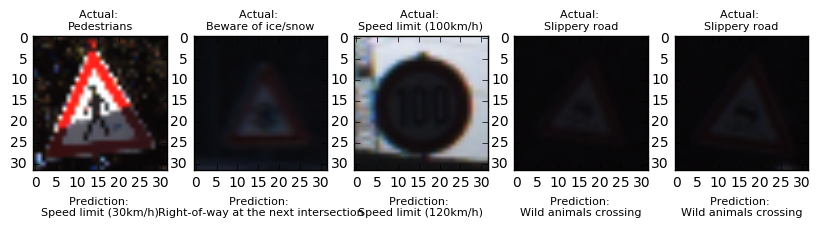

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

%matplotlib inline

num_x = 5
num_y = 1
fig, ax = plt.subplots(num_y,num_x)
fig.set_size_inches(10,10)
for i in range(num_x*num_y):
    n = random.random()*len(gotten_wrong_list)
    
    ax[i].imshow(X_test[gotten_wrong_list[int(n)][0]])
    
    ax[i].set_title("Actual: \n"+sign_names[y_test[gotten_wrong_list[int(n)][0]]],fontsize=8)
    ax[i].set_xlabel("Prediction: \n"+sign_names[gotten_wrong_list[int(n)][1]],fontsize=8)

plt.show()

The Images gotten wrong are **blurry**, or **faded**. Also the conv net predicts images that occur more **frequently** in the dataset as can be seen from the histogram above.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

* I load a set of **15** custom images from google that I resized to **32x32** by hand. (Loading JPEG images requires `pillow`).

In [29]:
from matplotlib.image import imread
custom_images = []

for i in range(15):
    custom_images.append(imread("Captured-Image-Data/image"+str(i)+".jpg",))

* **Normalize** by maximum and subtract the **mean training** image.

In [30]:
X_test_custom = np.array(custom_images)/255
X_test_custom = X_test_custom - mean_image

* I made a prediction fuction.

In [31]:
predictions = tf.argmax(logits, 1)

def predict_on_custom_data(X_data):
    sess = tf.get_default_session()
    pred = sess.run(predictions, feed_dict={x:X_data, train:-1})
    return pred

* Run the images through hte Conv Net Classifier and get predictions

In [32]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    predictions = predict_on_custom_data(X_test_custom)
    print(predictions)

[14 14  2 14 20  2 35 35 35 33 33 40 40 12 12]


* **Plot the images along with their predictions**

/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


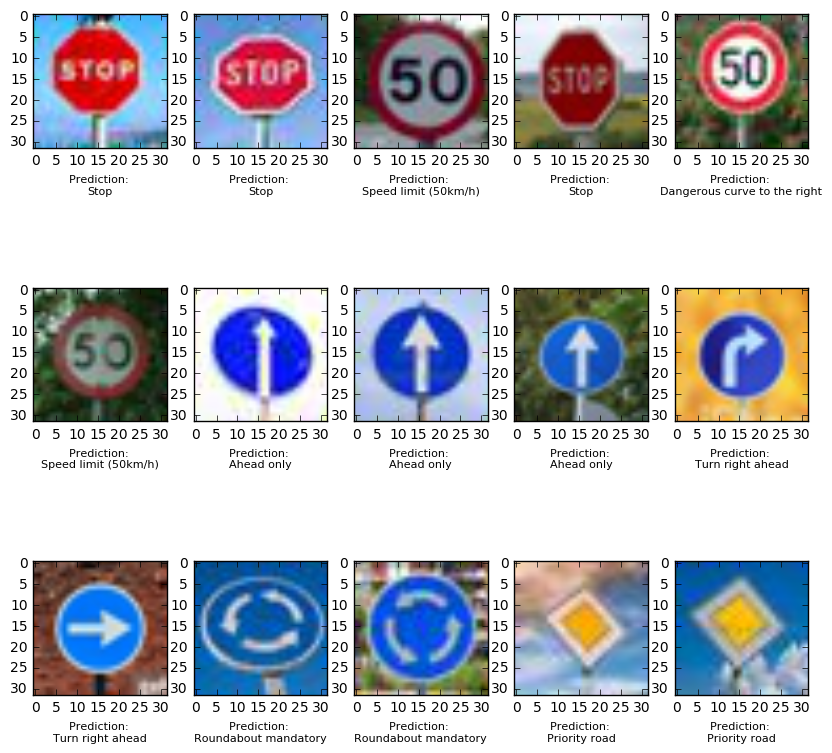

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

num_x = 5
num_y = 3
fig, ax = plt.subplots(num_y,num_x)
fig.set_size_inches(10,10)
for i in range(num_x*num_y):
    ax[i/num_x][i%num_x].imshow(custom_images[i])
    
    ax[i/num_x][i%num_x].set_xlabel("Prediction: \n"+sign_names[predictions[int(i)]],fontsize=8)

plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

* Function for getting **top 3 predictions** and thier **softmax** probabilities

In [34]:
top_predictions = tf.nn.top_k(tf.nn.softmax(logits), k=3)

def top_predict_on_custom_data(X_data):
    sess = tf.get_default_session()
    pred = sess.run(top_predictions, feed_dict={x:X_data, train:-1})
    return pred

* Get **Top 3** predictions for all the images

In [35]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = top_predict_on_custom_data(X_test_custom)

* Plot the **images** along with the probabilities of the **top 3 predications**

/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


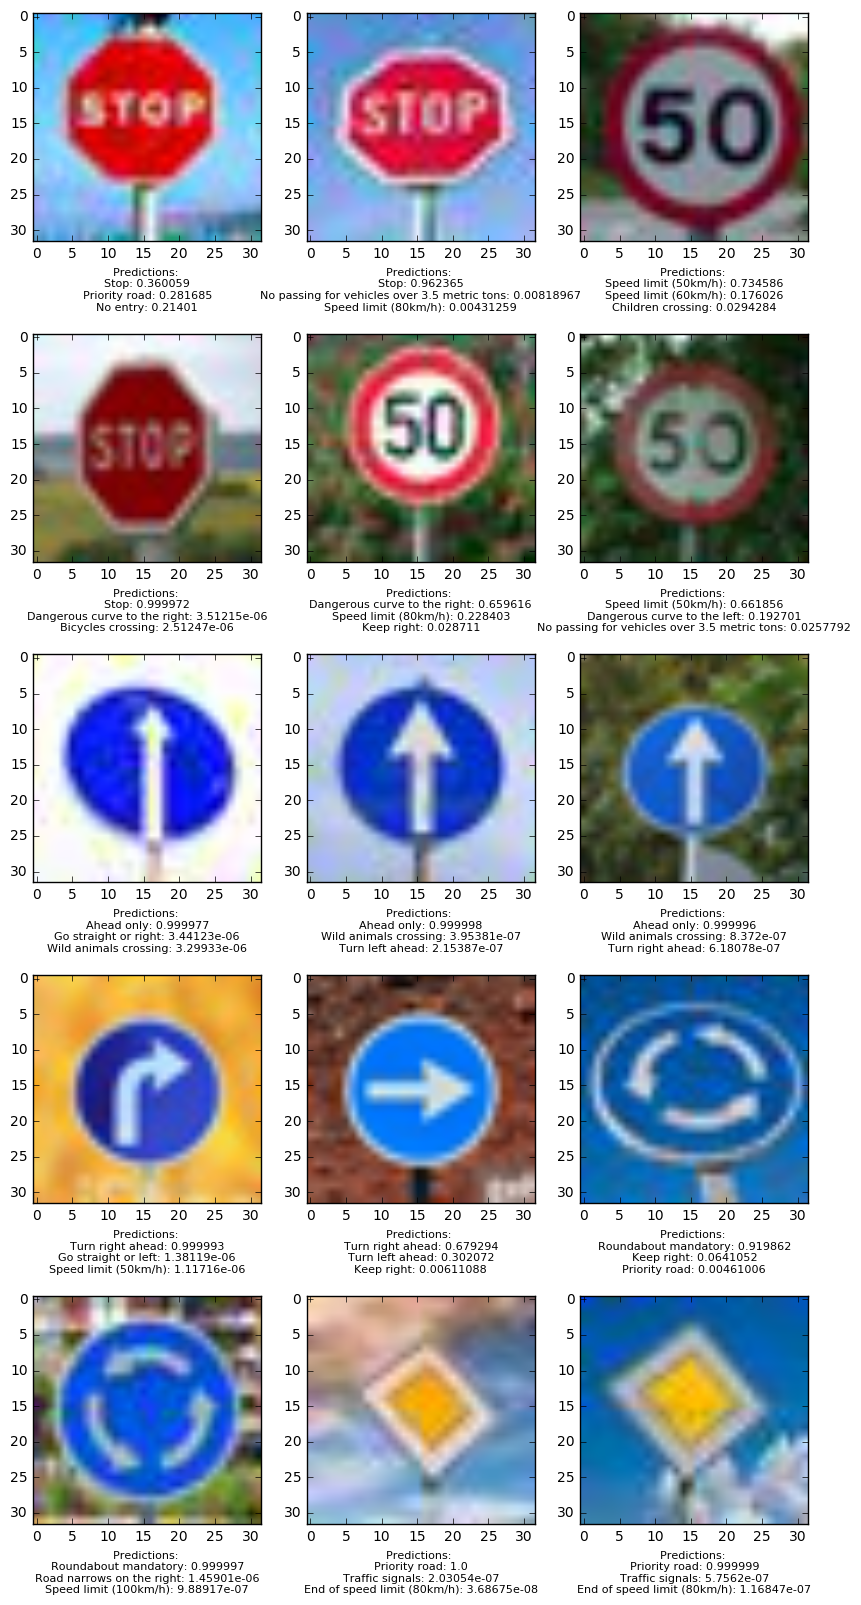

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

num_x = 3
num_y = 5
fig, ax = plt.subplots(num_y,num_x)
fig.set_size_inches(10,20)
for i in range(num_x*num_y):
    ax[i/num_x][i%num_x].imshow(custom_images[i])

    ax[i/num_x][i%num_x].set_xlabel(
        "Predictions: \n"+
        sign_names[predictions.indices[int(i)][0]]+
                   ": "+str(predictions.values[int(i)][0])+"\n"+
                   sign_names[predictions.indices[int(i)][1]]+
                              ": "+str(predictions.values[int(i)][1])+"\n"+
                              sign_names[predictions.indices[int(i)][2]]+
                                         ": "+str(predictions.values[int(i)][2])
                  ,fontsize=8)

plt.show()

The Model is very ceratin about most the images that I used to test it giving **>0.9** softmax probability to the top result

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.